# Import lib


In [1]:
import pandas as pd
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [2]:
train_path = 'archive/new_dataset/train'
test_path = 'archive/new_dataset/test'

In [3]:
classes = glob('archive/colored_images_mod/train/*')

In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [6]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Densenet121

In [7]:
Densenet_model = Sequential()

pretrained_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None
)

for layers in pretrained_model.layers:
    layers.trainable = False

Densenet_model.add(pretrained_model)
Densenet_model.add(Flatten())
Densenet_model.add(Dense(256, activation='relu'))
Densenet_model.add(Dense(5, activation='softmax'))

In [8]:
Densenet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 50176)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 256)               12845312  
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 5)                 1285      
Total params: 19,884,101
Trainable params: 12,846,597
Non-trainable params: 7,037,504
_________________________________________________________________


In [9]:
Densenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
epochs=50
history = Densenet_model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 85s 773ms/step - loss: 4.7257 - accuracy: 0.6268 - val_loss: 0.8875 - val_accuracy: 0.7203
Epoch 2/50
92/92 [==============================] - 64s 695ms/step - loss: 0.8405 - accuracy: 0.7228 - val_loss: 0.7857 - val_accuracy: 0.7544
Epoch 3/50
92/92 [==============================] - 94s 1s/step - loss: 0.7507 - accuracy: 0.7467 - val_loss: 0.6103 - val_accuracy: 0.7626
Epoch 4/50
92/92 [==============================] - 83s 901ms/step - loss: 0.6526 - accuracy: 0.7641 - val_loss: 0.7533 - val_accuracy: 0.7503
Epoch 5/50
92/92 [==============================] - 45s 484ms/step - loss: 0.6008 - accuracy: 0.7760 - val_loss: 0.7379 - val_accuracy: 0.7394
Epoch 6/50
92/92 [==============================] - 38s 415ms/step - loss: 0.5633 - accuracy: 0.7958 - val_loss: 0.5872 - val_accuracy: 0.7681
Epoch 7/50
92/92 [==============================] - 38s 409ms/step - loss: 0.5491 - accuracy: 0.7921 - val_loss: 0.6186 - val_accuracy: 0.7299
Ep

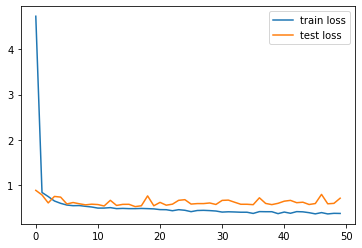

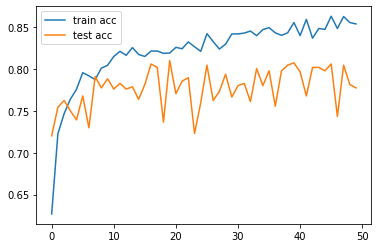

In [11]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()